# 1.  Introduction to the course & Digital transformation of the energy sector
In this notebook, we will explore the dataset to understand its structure, content, and basic properties. This step is crucial for identifying data quality, distributions, and patterns before applying any machine learning models.

In [1]:
from functions import *

---
## 1.1 PV generation, demand, and electricity price over a few days.
We use the dataset, which is provided in /data directory
The dataset includes several variables such as timestamp, demand, price,
PV, and weather-related data.

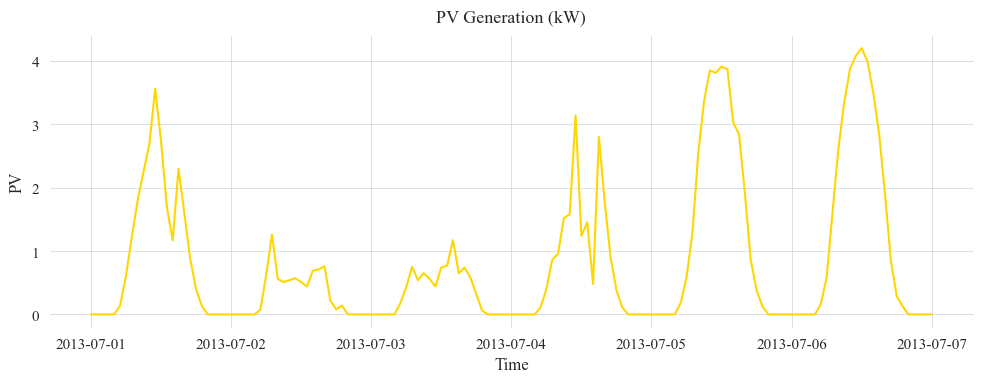

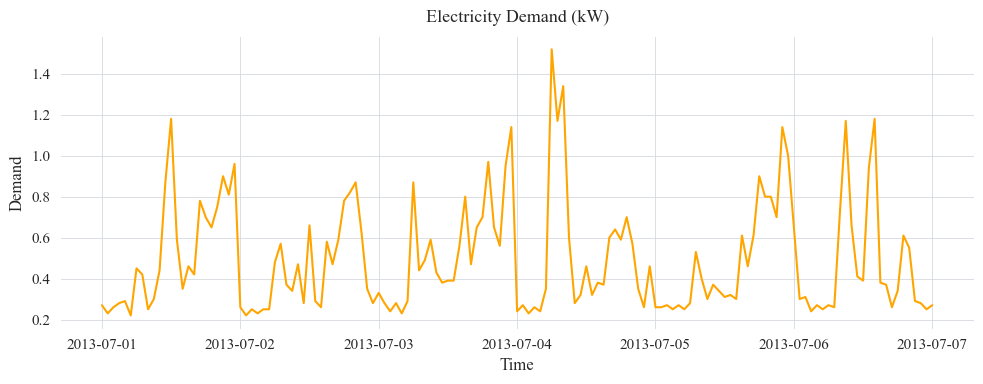

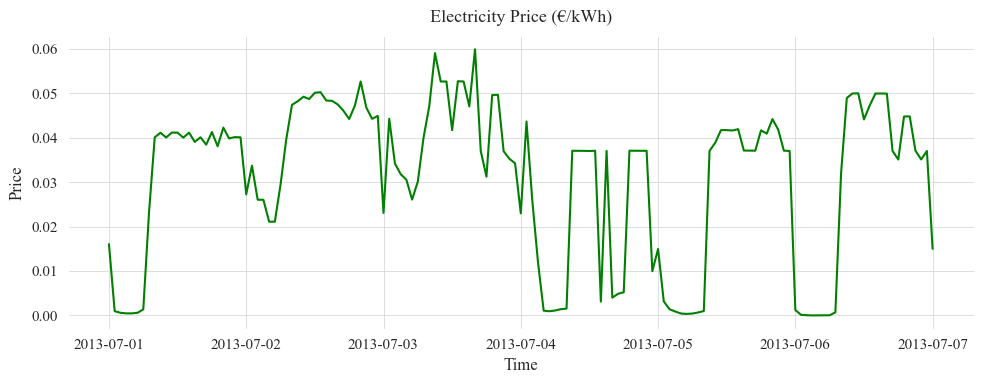

In [2]:
df = load_data()

start = df.index.min()
end = start + pd.Timedelta(days=6)
subset = df[start:end]

# PV generation
plot_and_save(subset['pv'], "ex1_fig1_pv_generation.svg", 'gold', 'PV Generation (kW)', 'Time [h]', 'PV')

# Demand
plot_and_save(subset['demand'], "ex1_fig2_demand.svg", 'orange', 'Electricity Demand (kW)', 'Time', 'Demand')

# Price
plot_and_save(subset['price'], "ex1_fig3_price.svg", 'green', 'Electricity Price (€/kWh)', 'Time', 'Price')

In [3]:
df[['pv', 'demand', 'price']].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
pv,8759.0,0.660,1.106,0.0,0.000,0.000,0.82,4.810
demand,8759.0,0.531,0.375,0.0,0.280,0.380,0.66,4.240
price,8759.0,0.046,0.025,0.0,0.028,0.045,0.06,0.255


In [4]:
window = df.loc['2013-07-01':'2013-07-07']
daily_summary = window.resample('D')[['pv', 'demand', 'price']].agg({'pv':'sum', 'demand':'sum', 'price':'mean'})
daily_summary.round(3)

,pv,demand,price
timestamp,,,
2013-07-01 00:00:00+00:00,23.17,12.83,0.029
2013-07-02 00:00:00+00:00,7.67,10.55,0.041
2013-07-03 00:00:00+00:00,8.58,13.08,0.042
2013-07-04 00:00:00+00:00,17.69,12.52,0.021
2013-07-05 00:00:00+00:00,32.52,11.73,0.026
2013-07-06 00:00:00+00:00,33.91,11.36,0.029
2013-07-07 00:00:00+00:00,34.27,9.15,0.028


### Figure 1.
The PV generation shows a clear daily pattern.
Power production starts in the morning, reaches its peak around noon, and drops to zero during the night.
This reflects the natural solar cycle and shows when renewable energy is available for use.

### Figure 2.
Electricity demand varies throughout the day.
It is generally higher in the morning and evening when household activity increases, and lower during the night.
These variations help to understand user behavior and energy needs.

### Figure 3.
The electricity price fluctuates during the observed days.
It does not directly follow PV generation but is influenced by market conditions and total grid demand.
Understanding price changes is important for optimizing energy use and costs.


## 1.2 How digitalization transforms household energy?
At the household level, digital transformation can significantly improve household energy efficiency. Modern digital tools enable households to monitor and control their electricity use in real-time, helping to eliminate waste and unnecessary consumption. Because many of these devices are connected to the internet, they can be managed remotely. This interconnected framework, known as the IoT, provides continuous, real-time data on electricity consumption, production and environmental conditions. Such a network forms the foundation for Home Energy Management Systems (HEMS), which can automatically decide when to use, store, or sell electricity, based on current conditions and forecasts.
Digitalization in household energy systems can be viewed through three main aspects. First is the flexibiliy, which refers to the ability to manage energy consumption according to grid load and electricity prices. This not only helps to reduce households their costs, but also contributes to overall grid stability. Second, renewable energy integration becomes feasible through accurate data and forecasts. Solar generation, storage, and consumption can be synchronized based on weather data and production estimates. And third, energy efficiency is improved when detailed consumption data are analyzed to reduce waste and optimize energy use patterns.

Digitalization brings data-based decision-making into the whole energy sector. With the help of IoT sensors, cloud computing and machine learning, large amounts of data can be analyzed continuously to forecast electricity demand, detect unusual patterns and improve control strategies. Automated energy management reduces the need for human control and allows devices to work in the most efficient and environmentally friendly way. And this also increases comfort and convenience for users but also helps energy providers and grid operators keep the balance between electricity supply and demand.
In addition, the digital transformation of energy systems increases consumer engagement. When people can see their energy use and costs in real time, they become more interested in saving energy and are more willing to invest in technologies such as solar panels, batteries, or smart home devices. In this way, digitalization supports both technological progress and behavioral change, helping to achieve broader goals of energy efficiency and sustainability.


## 1.3 Working with solar genration data
(a) Why is it important?
Working with solar generation data is important because solar energy is not stable meaning that it is dependent on weather conditions. The amount of electricity generated can change every hour due to the conditions like cloudiness or temperature. Accurate data gives better forecasting results, which helps to balance production and demand and to use storage systems more efficiently. In addition, this information supports economic and environmental decision-making, such as reducing electricity costs, maximizing self-consumption, and increasing the share of renewable energy in total energy use.

(b) How can it be used in private and business sectors?
In the private sector, households can use solar generation data to plan when to consume or sell energy back to the grid. For example, HEMS can use these data to automatically charge home devices, such as batteries or electical vehicles when solar production is high. And switch to grid power when production is low. This can save a lot of money and increase energy independence.
In the business sector, companies can use solar generation data for energy optimization. Businesses can analyze production trends to schedule energy-intensive processes during high solar output, manage multiple solar sites, or predict future investment needs. For energy providers and grid operators, solar generation data are also essential for forecasting total renewable production, maintaining grid stability, and designing dynamic pricing models that reflect real-time supply and demand conditions.



